1. Water evaporates
2. Creates warm moist air
3. Wind blows air out of the way, allowing more water to evaporate
4. Warm, moist air rises
5. Rising water vapor then begins to cool
6. At high altitude, water vapor condenses back into liquid
7. Water droplets form clouds
8. Clouds are big, stormy, cumulonimbus
9. As warm air continues rising, wind begins blowing in circular pattern around a center
10. Spiraling winds gather cluster of thunderstorm clouds
11. Spinning winds reach 74mph, becomes hurricane

# Step 1
Show simulation where
1. water is heating up
2. water is rising
3. creating low pressure zone
4. wind blowing low pressure zone
5. air particles start rising themselves
5. more water warming up and rising due to low pressure





In [ ]:
import numpy as np
import pandas as pd
import itertools

In [ ]:
# Create a 100x100 array at elevation 0
numParticlesGridLength = 10
numAttr = 7
waterMolecules = np.zeros((numParticlesGridLength**3, numAttr), dtype=int)

df = pd.DataFrame(waterMolecules, columns=['x', 'y', 'z', 'temp', 'pressureExerted', 'density', 'state'])
print(df)

     x  y  z  temp  pressureExerted  density  state
0    0  0  0     0                0        0      0
1    0  0  0     0                0        0      0
2    0  0  0     0                0        0      0
3    0  0  0     0                0        0      0
4    0  0  0     0                0        0      0
..  .. .. ..   ...              ...      ...    ...
995  0  0  0     0                0        0      0
996  0  0  0     0                0        0      0
997  0  0  0     0                0        0      0
998  0  0  0     0                0        0      0
999  0  0  0     0                0        0      0

[1000 rows x 7 columns]


In [ ]:
df['state'] = 'liquid'
print(df)

     x  y  z  temp   state
0    0  0  0     0  liquid
1    0  0  0     0  liquid
2    0  0  0     0  liquid
3    0  0  0     0  liquid
4    0  0  0     0  liquid
..  .. .. ..   ...     ...
995  0  0  0     0  liquid
996  0  0  0     0  liquid
997  0  0  0     0  liquid
998  0  0  0     0  liquid
999  0  0  0     0  liquid

[1000 rows x 5 columns]


In [ ]:
combinations = list(itertools.product(range(numParticlesGridLength), repeat=3))
print(combinations)
df['x'], df['y'], df['z'] = zip(*combinations)

print(df)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 0, 7), (0, 0, 8), (0, 0, 9), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 1, 8), (0, 1, 9), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 2, 7), (0, 2, 8), (0, 2, 9), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 3, 5), (0, 3, 6), (0, 3, 7), (0, 3, 8), (0, 3, 9), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 4, 5), (0, 4, 6), (0, 4, 7), (0, 4, 8), (0, 4, 9), (0, 5, 0), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 5, 5), (0, 5, 6), (0, 5, 7), (0, 5, 8), (0, 5, 9), (0, 6, 0), (0, 6, 1), (0, 6, 2), (0, 6, 3), (0, 6, 4), (0, 6, 5), (0, 6, 6), (0, 6, 7), (0, 6, 8), (0, 6, 9), (0, 7, 0), (0, 7, 1), (0, 7, 2), (0, 7, 3), (0, 7, 4), (0, 7, 5), (0, 7, 6), (0, 7, 7), (0, 7, 8), (0, 7, 9), (0, 8, 0), (0, 8, 1), (0, 8, 2), (0, 8, 3), (0, 8, 4), (0, 8, 5), (0, 8, 6), (0, 8, 7), (0, 8, 8), (0, 8, 9), (0, 9, 0)

In [ ]:
# for i in range(numParticlesGridLength-1, -1, -1):
#     df.loc[df['z'] == i, 'pressure'] = (numParticlesGridLength-i) * 10_000

# df
df['pressureExerted'] = 10_000
df

x  y  z  temp  pressureExerted  density  state
0    0  0  0     0            10000        0      0
1    0  0  1     0            10000        0      0
2    0  0  2     0            10000        0      0
3    0  0  3     0            10000        0      0
4    0  0  4     0            10000        0      0
..  .. .. ..   ...              ...      ...    ...
995  9  9  5     0            10000        0      0
996  9  9  6     0            10000        0      0
997  9  9  7     0            10000        0      0
998  9  9  8     0            10000        0      0
999  9  9  9     0            10000        0      0

[1000 rows x 7 columns]

In [ ]:
def warmUpTemp(df):
    random_increments = np.random.randint(0, 5, size=len(df))
    df['temp'] += random_increments
    return df


In [ ]:
for i in range(10):
    df = warmUpTemp(df)

# water evaporates at all temp depending on humidity, this doesn't work
df.loc[df['temp'] >= 100, 'state']= 'gas'
print(df[df['state'] == 'gas'])


Empty DataFrame
Columns: [x, y, z, temp, state]
Index: []


In [ ]:
def evaporateWater(df):
    df.loc[df['state'] == 'gas', 'elevation'] += 1
    return df

def windBlowing(df):
    df.loc[df['x'] > 0, 'x'] -= 1
    return df



In [ ]:
# TEST - all x>5 with z=1 moved up. All x>5 should then be able to evaporate
df.loc[(df['x'] > 5) & (df['z'] == 1), 'z'] += 1

# print(df[(df['x'] > 5) & (df['z'] == 0)])

'''
This finds all the water molecules at x,y,z=0 that have no corresponding molecule at x,y,z=1 ie right above them.
These molecules have "room" to evaporate above them.
'''

# Extract all water @ z = 0 and set it to z=1
waterHeight = df.loc[(df['z'] == 0), ['x', 'y']]
waterHeight['z'] = 1

# print(waterHeight)

# Merge the waterHeight molcules with all the ones originally at z = 1. Keep the index.
waterHeight = pd.merge(waterHeight, df[df['z'] == 1], on=['x', 'y'], how='left', indicator=True).set_axis(waterHeight.index)

# Find all the molecules in the merge that only existed in waterHeight. These are the molecules at water level that have no molecules at z=1. Set their z back to 0
waterHeight.loc[waterHeight['_merge'] == 'left_only', ['z_x']] = 0
# Extract x,y,z=0 that have no molecule at z+1
mergedXY = waterHeight.loc[waterHeight['_merge'] == 'left_only', ['x', 'y', 'z_x']]
print(mergedXY)
print(mergedXY.index)

# Using the index, update them somehow, placeholder state=gas
df.loc[mergedXY.index, 'state'] = 'gas'

df[df['state'] == 'gas']

     x  y  z_x
600  6  0    0
610  6  1    0
620  6  2    0
630  6  3    0
640  6  4    0
650  6  5    0
660  6  6    0
670  6  7    0
680  6  8    0
690  6  9    0
700  7  0    0
710  7  1    0
720  7  2    0
730  7  3    0
740  7  4    0
750  7  5    0
760  7  6    0
770  7  7    0
780  7  8    0
790  7  9    0
800  8  0    0
810  8  1    0
820  8  2    0
830  8  3    0
840  8  4    0
850  8  5    0
860  8  6    0
870  8  7    0
880  8  8    0
890  8  9    0
900  9  0    0
910  9  1    0
920  9  2    0
930  9  3    0
940  9  4    0
950  9  5    0
960  9  6    0
970  9  7    0
980  9  8    0
990  9  9    0
Index([600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730,
       740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870,
       880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990],
      dtype='int64')


x  y  z  temp state
600  6  0  0    13   gas
610  6  1  0    26   gas
620  6  2  0     8   gas
630  6  3  0    24   gas
640  6  4  0    22   gas
650  6  5  0    25   gas
660  6  6  0    16   gas
670  6  7  0    27   gas
680  6  8  0    21   gas
690  6  9  0    21   gas
700  7  0  0    20   gas
710  7  1  0    24   gas
720  7  2  0    25   gas
730  7  3  0    13   gas
740  7  4  0    16   gas
750  7  5  0    29   gas
760  7  6  0    19   gas
770  7  7  0    16   gas
780  7  8  0    16   gas
790  7  9  0    14   gas
800  8  0  0    18   gas
810  8  1  0    21   gas
820  8  2  0    23   gas
830  8  3  0    23   gas
840  8  4  0    23   gas
850  8  5  0    19   gas
860  8  6  0    28   gas
870  8  7  0    21   gas
880  8  8  0    21   gas
890  8  9  0    19   gas
900  9  0  0    26   gas
910  9  1  0    20   gas
920  9  2  0    17   gas
930  9  3  0    19   gas
940  9  4  0    19   gas
950  9  5  0    17   gas
960  9  6  0    15   gas
970  9  7  0    13   gas
980  9  8  0    15   gas
990  9  9  0    28   gas

In [ ]:
# TEST wind blows some particles out of the way
df.loc[(df['x'] < 3) & (df['y'] < 3) & (df['z'] > 0), 'x'] = -1
df.loc[(df['x'] < 3) & (df['y'] < 3) & (df['z'] > 0), 'y'] = -1

pressureAreas = df[(df['z'] >= 0) & (df['y'] >= 0) & (df['x'] >= 0)].groupby(['x', 'y'])['z'].count().reset_index(name='count')
print('low pressure areas: ')
print(pressureAreas.loc[pressureAreas['count'] == 1, ['x', 'y']])
# print(pressureAreas.columns)

print('high pressure areas: ')
print(pressureAreas.loc[pressureAreas['count'] > 1, ['x', 'y']])

low pressure areas: 
    x  y
0   0  0
1   0  1
2   0  2
10  1  0
11  1  1
12  1  2
20  2  0
21  2  1
22  2  2
high pressure areas: 
    x  y
3   0  3
4   0  4
5   0  5
6   0  6
7   0  7
.. .. ..
95  9  5
96  9  6
97  9  7
98  9  8
99  9  9

[91 rows x 2 columns]


In [ ]:
'''
1. water starts heating up
- x=0 starts warming up

2. check pressure above
- if higher than usual, evaporation has a smaller chance

3. when water evaporates creates low pressure zone
'''
# water temp heating up
df.loc[df['z'] == 0, 'temp'] += 1

df['pressureExerted'] -= 1000

df[(df['z'] > 0)].groupby(['x', 'y'])['pressureExerted'].sum().reset_index(name='totalPressure')

x  y  totalPressure
0   0  0          81000
1   0  1          81000
2   0  2          81000
3   0  3          81000
4   0  4          81000
.. .. ..            ...
95  9  5          81000
96  9  6          81000
97  9  7          81000
98  9  8          81000
99  9  9          81000

[100 rows x 3 columns]

In [ ]:
# Initialize x,y,z, remove particles above center for low pressure sim

# Warm up water at z=0

# Water evaporates

# Water vapor rises

# As it rises past z=2, surrounding air moves in

# Water vapor cools as it rises

# Water vapor spreads out at top

In [ ]:
waterVapor = df[(df['y'] > 3) & (df['y'] < 6) & (df['x'] > 3) & (df['x'] < 6)]

df.loc[df['x'] == 4, 'x'] -= 1
df.loc[df['x'] == 5, 'x'] += 1


In [ ]:
def generateFrames(df):
    # Water increasing in temp to 26
    waterAtMiddle = df[(df['z'] == 0) & (df['y'] > 3) & (df['y'] < 6) & (df['x'] > 3) & (df['x'] < 6)]

    df.loc[waterAtMiddle.index, 'temp'] += 1
    yield df

    df.loc[waterAtMiddle.index, 'temp'] += 1
    yield df

    # Water evaporating
    for i in range(10):
        df.loc[waterAtMiddle.index, 'z'] += 1
        yield df

    # Water spreading out
    for i in range(1):
        df.loc[(df['y'] == 4) & ((df['x'] == 4) | (df['x'] == 5)), 'y'] -= 1
        df.loc[(df['y'] == 5) & ((df['x'] == 4) | (df['x'] == 5)), 'y'] += 1
        yield df

    for i in range(100):
        yield df


    return df

In [ ]:
df = pd.DataFrame(waterMolecules, columns=['x', 'y', 'z', 'temp', 'pressureExerted', 'density', 'state'])
combinations = list(itertools.product(range(numParticlesGridLength), repeat=3))
# print(combinations)
df['x'], df['y'], df['z'] = zip(*combinations)

df['temp'] = 24

# print(df)

In [ ]:
middleAir = df[(df['z'] > 0) & (df['y'] > 3) & (df['y'] < 6) & (df['x'] > 3) & (df['x'] < 6)]
df.drop(middleAir.index, inplace=True)

In [4]:
!apt-get install -y imagemagick  # For saving as GIF

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  imagemagick-6.q16 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x imagemagick-doc
  autotrace cups-bsd | lpr | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer
  povray radiance sane-utils texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev
  inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nan

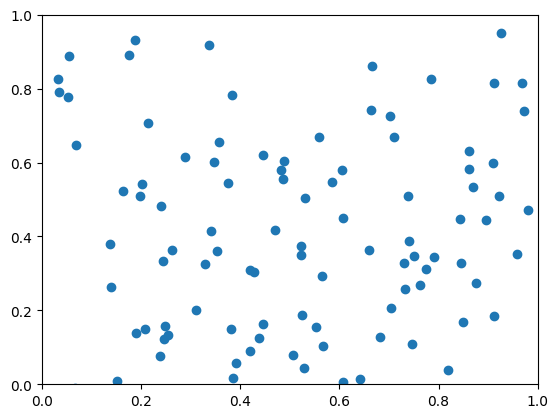

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create a figure and axis
fig, ax = plt.subplots()

# Generate initial random positions for particles
num_particles = 100
x = np.random.rand(num_particles)
y = np.random.rand(num_particles)

# Scatter plot for the particles
scat = ax.scatter(x, y)

# Set the axis limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Update function for animation
def update(frame):
    global x, y
    # Move particles randomly in the 2D space
    x += (np.random.rand(num_particles) - 0.5) * 0.01
    y += (np.random.rand(num_particles) - 0.5) * 0.01
    # Update scatter plot with new positions
    scat.set_offsets(np.c_[x, y])
    return scat,

# Create animation
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# Save the animation as an HTML file and display it
HTML(ani.to_jshtml())  # This works in Google Colab


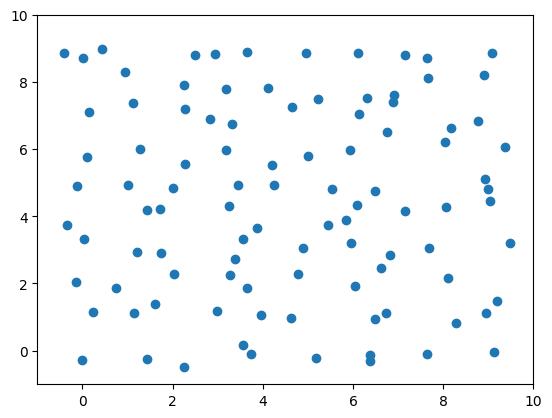

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate a 10x10 grid of points (0,0) to (9,9)
x, y = np.meshgrid(np.arange(10), np.arange(10))
x = x.flatten().astype(float)
y = y.flatten().astype(float)


# Create a figure and axis
fig, ax = plt.subplots()
scat = ax.scatter(x, y)

# Set axis limits
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)

# Update function for animation
def update(frame):
    global x, y
    # Move particles randomly in the 2D space by adding small random steps to x and y
    x += (np.random.rand(len(x)) - 0.5) * 0.1  # Step size is kept small to keep movement gradual
    y += (np.random.rand(len(y)) - 0.5) * 0.1
    # Update scatter plot with new positions
    scat.set_offsets(np.c_[x, y])
    return scat,

# Create animation
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# Save the animation as an HTML file and display it
HTML(ani.to_jshtml())  # This works in Google Colab
